# ANÁLISIS UNIVARIANTE



## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import pi
from ydata_profiling import ProfileReport

## Cargar dataset


In [2]:
ruta = '../data/calidad_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [3]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

In [4]:
dfcopy = df.drop(['ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2'], axis=1)
dfcopy.head(3)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,45.64
2,2019-01-01 07:00:00,2019.0,1.0,1.0,7,Martes,8.0,10.0,0.4,56.0,14.0,18.0,9.32,2.5,4.0,51.0,47.94


## Crear columna 'ESCALA_ICA'


Escala de calidad del aire: 

* Excelente  0 - 19
* Buena  20 - 49
* Mala  50 - 99
* Poco saludable  100 - 149
* Muy poco saludable 150 - 249
* Peligrosa 250+



In [5]:
# Crear la columna "escala_ica" basada en los valores de la columna "ICA"
df['ESCALA_ICA'] = pd.cut(df['ICA'], bins=[-float('inf'), 19, 49, 99, 149, 249, float('inf')], labels=['Excelente', 'Buena', 'Mala', 'Poco saludable', 'Muy poco saludable', 'Peligrosa'])

# Imprimir el resultado
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA,ESCALA_ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22,Buena
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64,Buena


In [6]:
df.dtypes

FECHA            object
ANO             float64
MES             float64
DIA             float64
HORA              int64
DIA_SEMANA       object
ESTACION        float64
SO2             float64
CO              float64
NO2             float64
PM2.5           float64
PM10            float64
O3              float64
BTX             float64
TEMPERATURA     float64
HUMEDAD         float64
ICA_SO2         float64
ICA_PM10        float64
ICA_O3          float64
ICA_NO2         float64
ICA             float64
ESCALA_ICA     category
dtype: object

## Transformar la columnas 

Transformar a datetime las columnas:

* FECHA	
* ANO	
* MES	
* DIA	
* HORA

In [7]:
# Convertir la columna "FECHA" a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extraer el año, mes y día
df['ANO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month
df['DIA'] = df['FECHA'].dt.day

df[['FECHA', 'ANO', 'MES', 'DIA']].head(2)

,FECHA,ANO,MES,DIA
0,2019-01-01 05:00:00,2019,1,1
1,2019-01-01 06:00:00,2019,1,1


In [8]:
# Comprobar si se ha realizado la trensformación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        30860 non-null  datetime64[ns]
 1   ANO          30860 non-null  int64         
 2   MES          30860 non-null  int64         
 3   DIA          30860 non-null  int64         
 4   HORA         30860 non-null  int64         
 5   DIA_SEMANA   30860 non-null  object        
 6   ESTACION     30860 non-null  float64       
 7   SO2          30860 non-null  float64       
 8   CO           30860 non-null  float64       
 9   NO2          30860 non-null  float64       
 10  PM2.5        30860 non-null  float64       
 11  PM10         30860 non-null  float64       
 12  O3           30860 non-null  float64       
 13  BTX          30860 non-null  float64       
 14  TEMPERATURA  30860 non-null  float64       
 15  HUMEDAD      30860 non-null  float64       
 16  ICA_

In [9]:
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA,ESCALA_ICA
0,2019-01-01 05:00:00,2019,1,1,5,Martes,8.0,10.0,0.4,50.0,...,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22,Buena
1,2019-01-01 06:00:00,2019,1,1,6,Martes,8.0,8.0,0.4,55.0,...,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64,Buena


In [10]:
df1 = df.copy()

## Obtener informe 

In [11]:
df1 = df.copy()

In [12]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 'ESCALA_ICA'],
      dtype='object')

In [13]:
df1.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 'ESCALA_ICA'],
      dtype='object')

In [14]:
df.drop(['ANO', 'MES', 'DIA', 'HORA','ESTACION', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2'], axis=1, inplace=True)


In [15]:
print(df.columns)
print(df1.columns)

Index(['FECHA', 'DIA_SEMANA', 'SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX',
       'TEMPERATURA', 'HUMEDAD', 'ICA', 'ESCALA_ICA'],
      dtype='object')
Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 'ESCALA_ICA'],
      dtype='object')


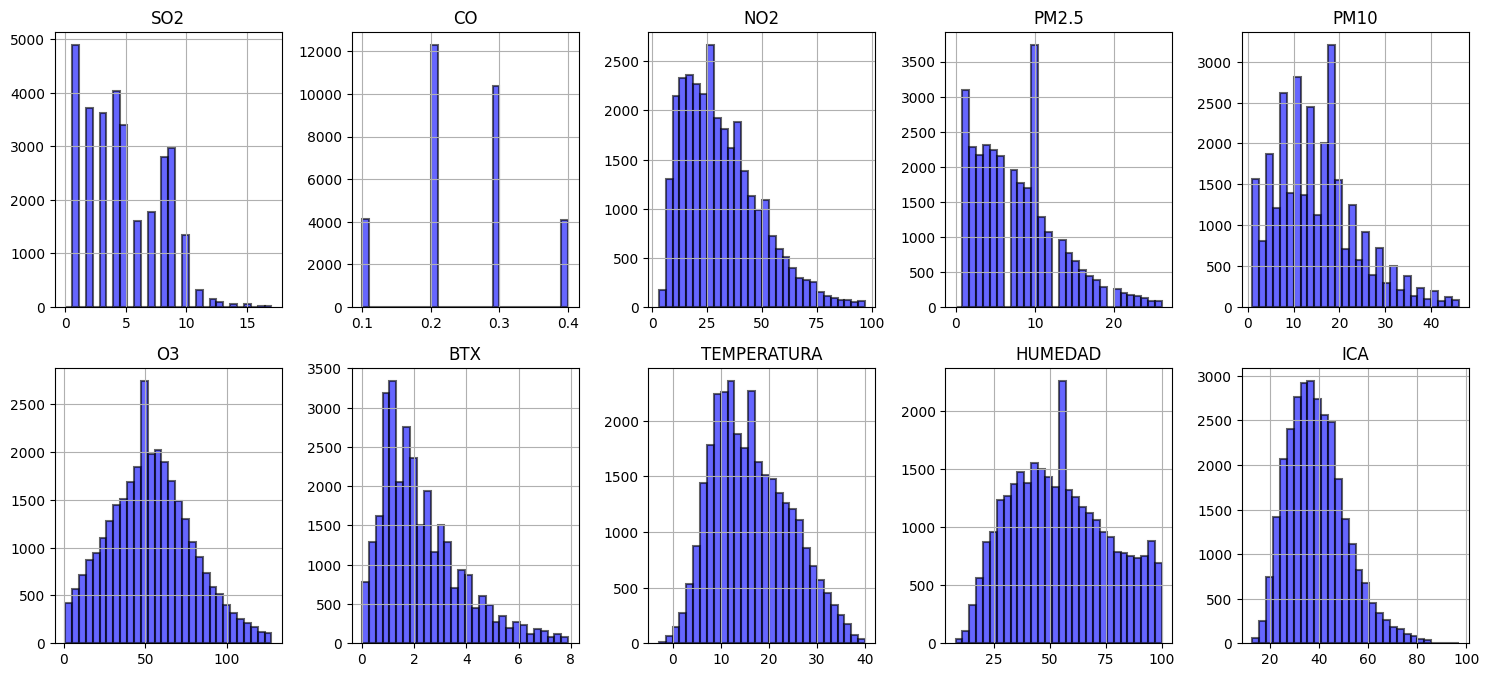

In [16]:
# Seleccionar las columnas para el histograma
columnas_histograma = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD', 'ICA', 'ESCALA_ICA']

# Graficar los histogramas en subplots
df[columnas_histograma].hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(15, 10), layout=(3, 5))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

####  2. Histograma para cada variable numérica

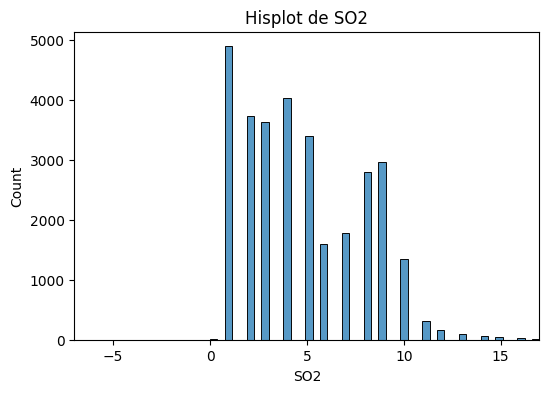

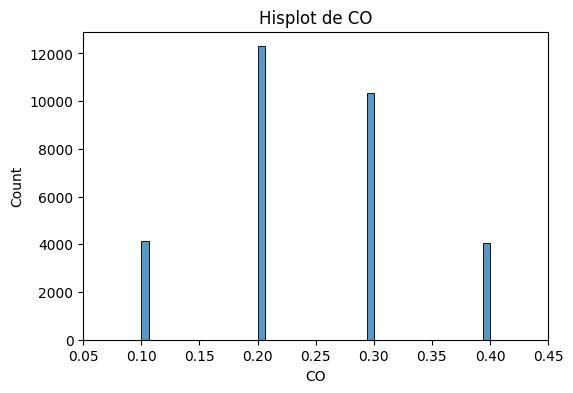

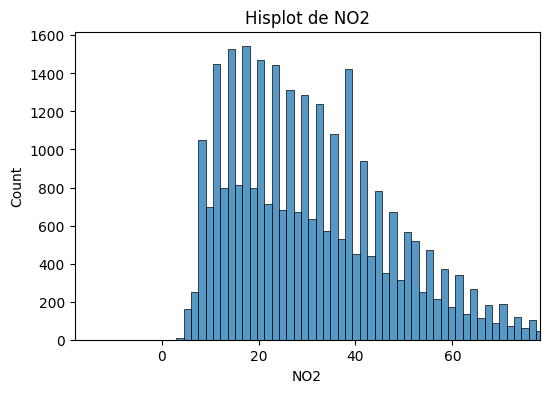

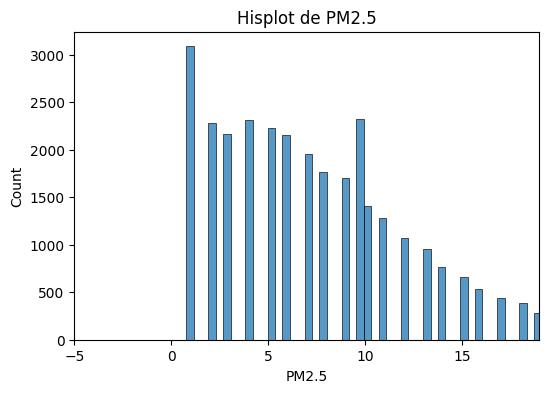

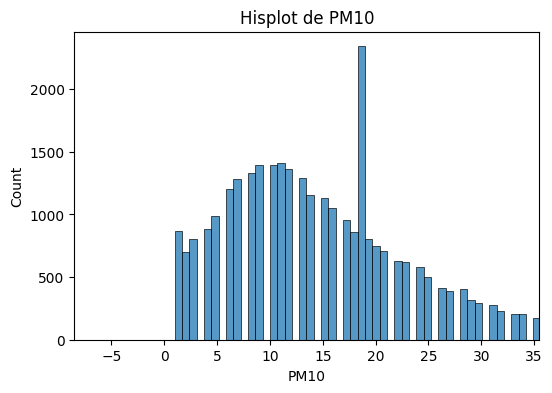

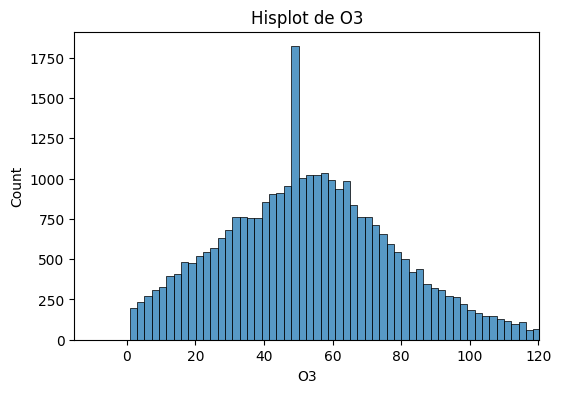

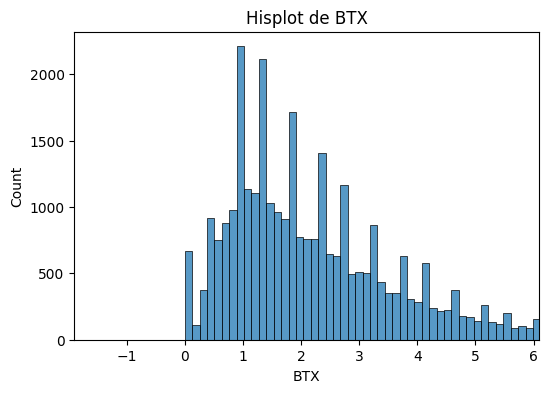

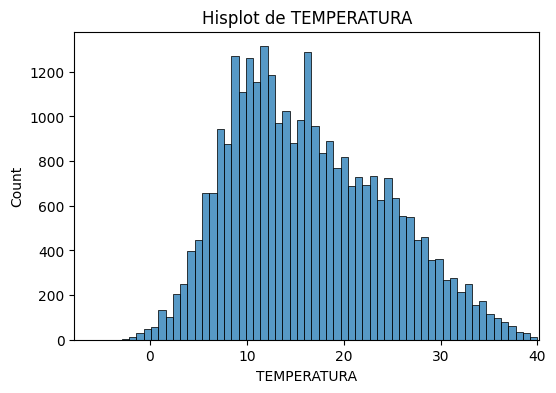

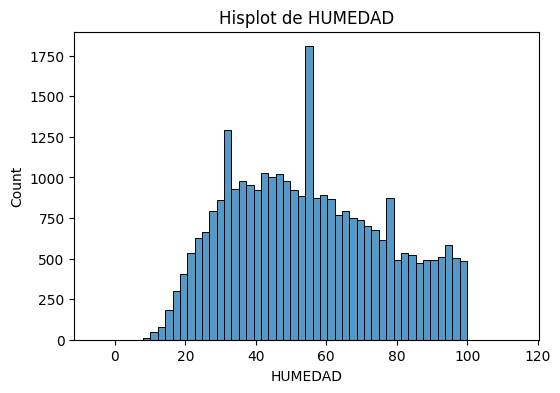

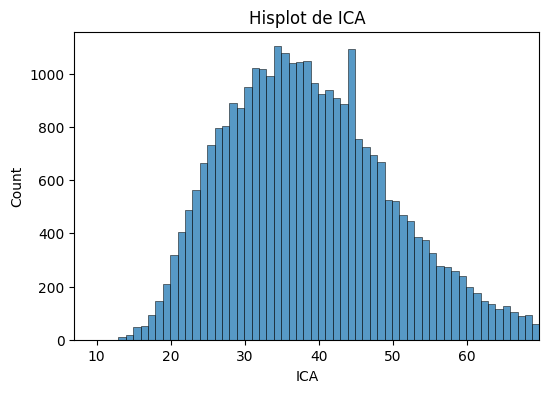

In [17]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f'Hisplot de {column}')
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    plt.xlim(lower_limit, upper_limit)
    
    plt.show()

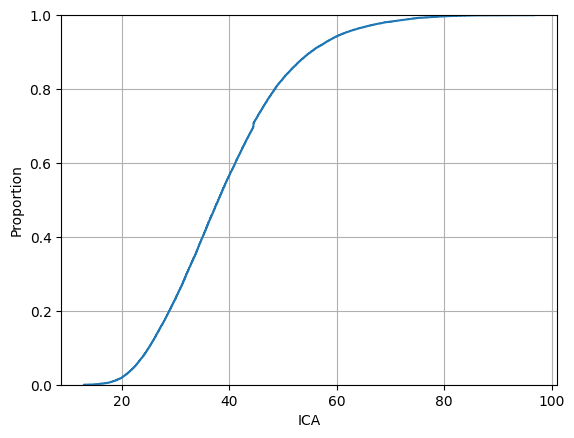

In [18]:
sns.ecdfplot(data=df, x="ICA")
plt.grid()

####  3. Visualización columnas categóricas

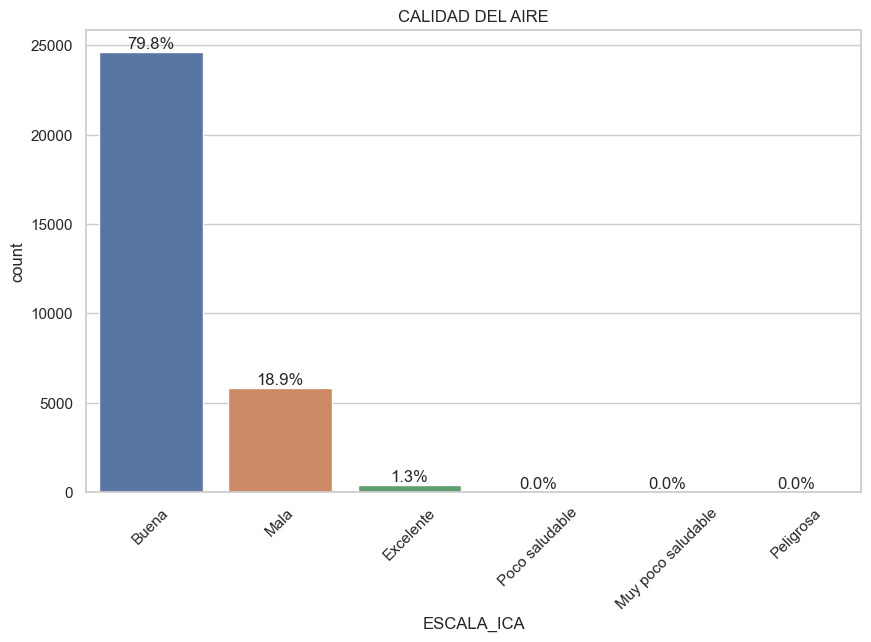

In [19]:
# Contar la cantidad de valores en cada categoría
counts = df['ESCALA_ICA'].value_counts()

# Crear el gráfico de tarta utilizando Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.title('CALIDAD DEL AIRE')
plt.xticks(rotation=45)
sns.countplot(x='ESCALA_ICA', data=df, order=counts.index)

# Agregar porcentajes a cada porción de la tarta
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


#### Visualización histórico de Fecha

* Mediante está visualización se puedes observara si existe estacionalidad de Indice de Calidad del aire (ICA) en el tiempo (01/2019 a 12/2022)

In [20]:
df.head(2)

,FECHA,DIA_SEMANA,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA,ESCALA_ICA
0,2019-01-01 05:00:00,Martes,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,45.22,Buena
1,2019-01-01 06:00:00,Martes,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,45.64,Buena


<Axes: xlabel='FECHA', ylabel='ICA'>

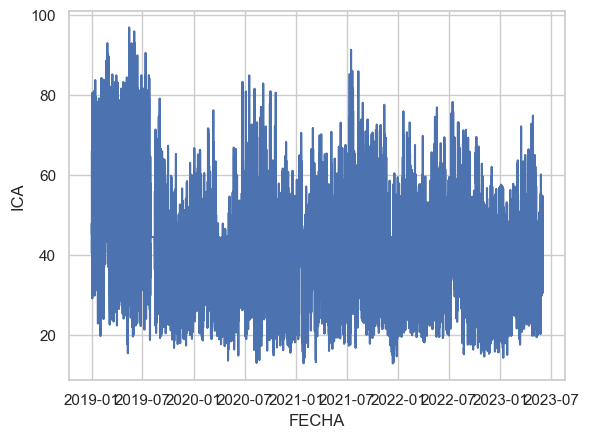

In [21]:
sns.lineplot(data=df, x="FECHA", y="ICA")

C:\Users\emona\AppData\Local\Temp\ipykernel_22908\80747285.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df.sample(500), x=column, y='ICA', ci=None, color='red', linewidth=2)


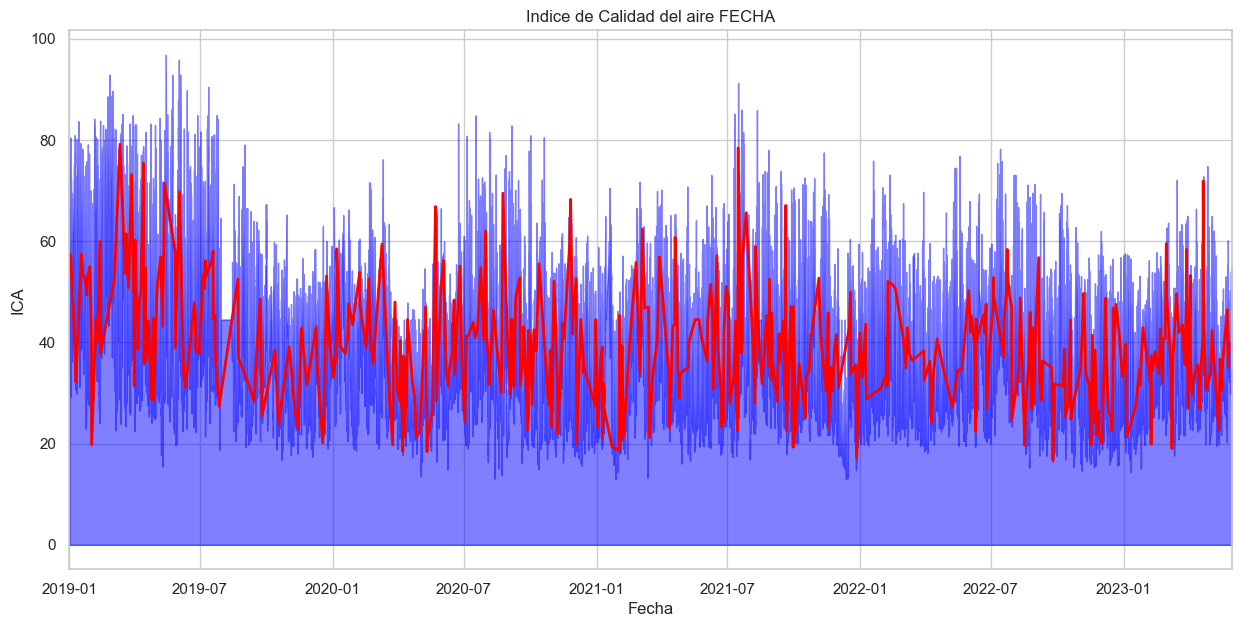

In [22]:

date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(15, 7))
    
    # Gráfico de área
    #sns.lineplot(data=df.sample(1000), x=column, y='ICA', ci=None, color='red')
    
    # Gráfico de línea
    sns.lineplot(data=df.sample(500), x=column, y='ICA', ci=None, color='red', linewidth=2)
    
    plt.title('Indice de Calidad del aire ' + column)
    plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2023-05-31'))
    plt.xlabel('Fecha')
    plt.ylabel('ICA')
    
    plt.fill_between(df[column], df['ICA'], color='blue', alpha=0.5)
    
    plt.show()


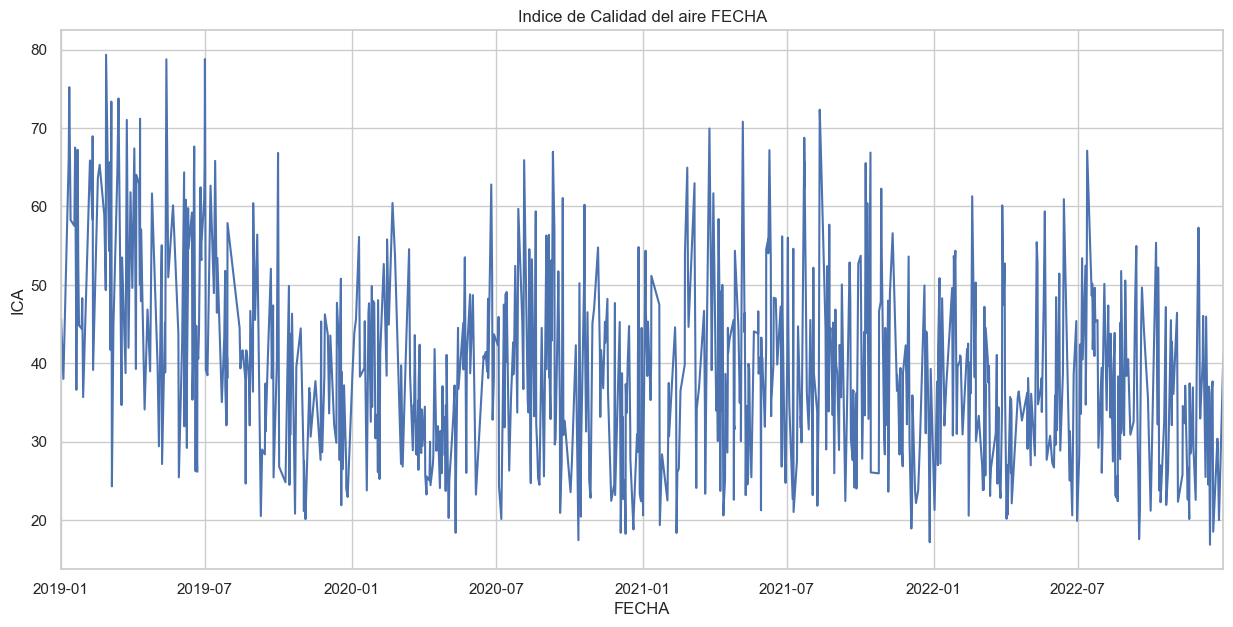

In [23]:
date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(15,7))
    
    sns.lineplot(data=df.sample(1000), x=column, y='ICA')
    plt.title('Indice de Calidad del aire ' + column)
    plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2022-12-31'))
    plt.show()

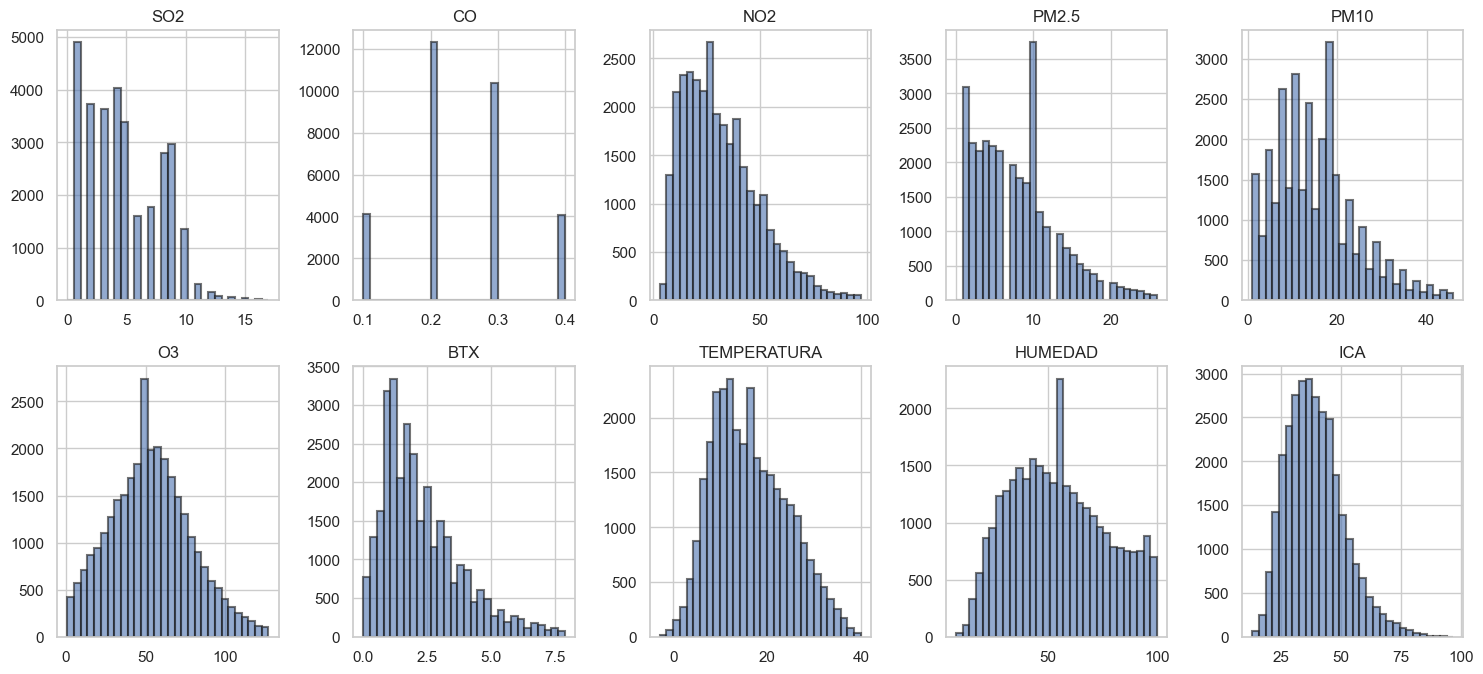

In [24]:
# Seleccionar las columnas para el histograma
# columnas_histograma = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA']
columnas_histograma = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD', 'ICA']
# Graficar los histogramas en subplots
df[columnas_histograma].hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(15, 10), layout=(3, 5))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

# ANÁLISIS BIVARIANTE

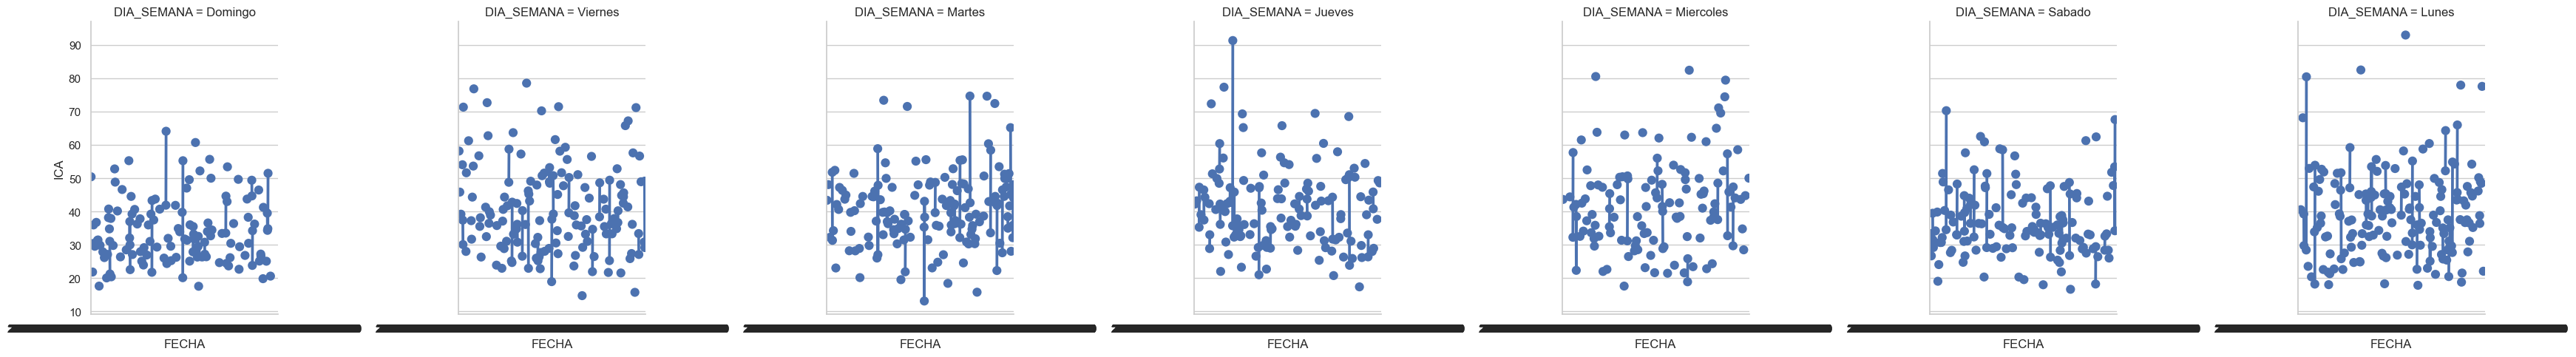

In [44]:
# Gráfico de puntos para analizar tendencias
sns.catplot(data=df.sample(1000), x='FECHA', y='ICA', col='DIA_SEMANA', kind='point',errorbar=None)

Text(0.5, 1.0, 'Evolución de la  Calidad del aire por AÑO')

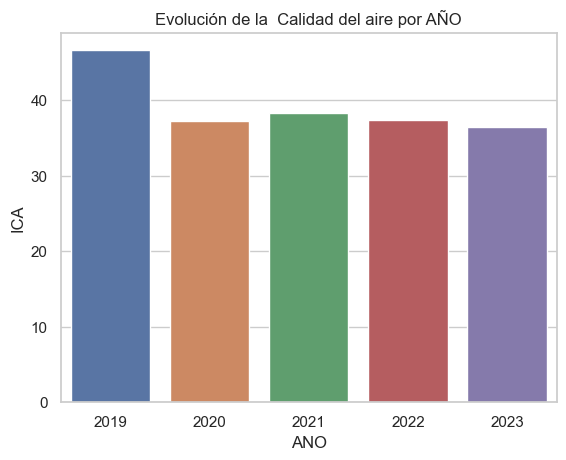

In [26]:
df_ica_ano = df1.groupby('ANO')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='ANO', y='ICA')
plt.title('Evolución de la  Calidad del aire por AÑO' )

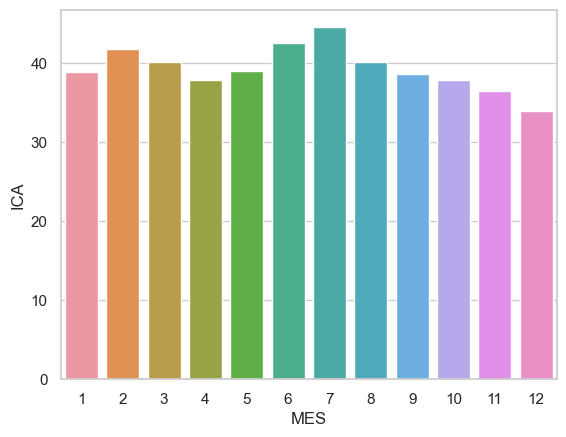

In [27]:
df_ica_ano = df1.groupby('MES')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='MES', y='ICA')

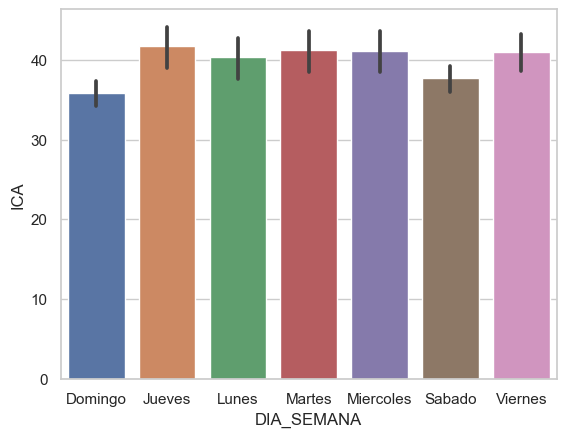

In [28]:
df_ica_ano = df1.groupby(['DIA_SEMANA','HORA'])['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='DIA_SEMANA', y='ICA')

In [29]:
df_ica_ano.columns

Index(['DIA_SEMANA', 'HORA', 'ICA'], dtype='object')

In [30]:
df_ica_ano['DIA_SEMANA'].unique()

array(['Domingo', 'Jueves', 'Lunes', 'Martes', 'Miercoles', 'Sabado',
       'Viernes'], dtype=object)

In [31]:
df_ica_ano['DIA_SEMANA'] = pd.Categorical(df_ica_ano['DIA_SEMANA'], categories=['Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo',
    'Lunes'], ordered=True)

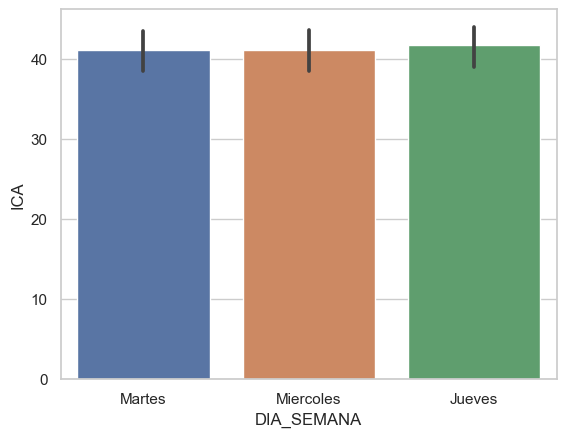

In [32]:
ax = sns.barplot(data=df_ica_ano, x='DIA_SEMANA', y='ICA', order=['Martes', 'Miercoles', 'Jueves'])


In [33]:
# agrupar precio medio por year y month en la misma agrupacion
# Saber trabajar con 2 columnas a la vez
df_year_month = df1.groupby(['ANO','MES'])['ICA'].mean().round(2)
df_year_month

# unstack() extrae el índice a una columna creando una TABLA PIVOTANTE por monthç/dia
df_year_month = df_year_month.unstack(level=0)
df_year_month

df_year_month = df_year_month.reset_index().rename_axis(None)
df_year_month

# unpivot: despivotar los valores de las columnas a una fila: convierte de ancho a largo
# id_vars: se duplica para cada valor úni co de año 2016, 2017, 2018
# var_name: nombre de la nueva columna al despivotar los años 2016, 2017, 2018
# value_name: nombre de la nueva columna que  tendrá los valores numéricos que estaban en 2016, 2017, 2018 
df_year_month = df_year_month.melt(var_name='ANO', id_vars='MES', value_name='ICA')
df_year_month

,MES,ANO,ICA
0,1,2019,52.26
1,2,2019,55.81
2,3,2019,53.39
3,4,2019,49.79
4,5,2019,46.98
5,6,2019,51.11
6,7,2019,51.03
7,8,2019,43.16
8,9,2019,40.02
9,10,2019,38.58


Text(0.5, 1.0, 'Evolución de la  Calidad del aire AÑO/MES')

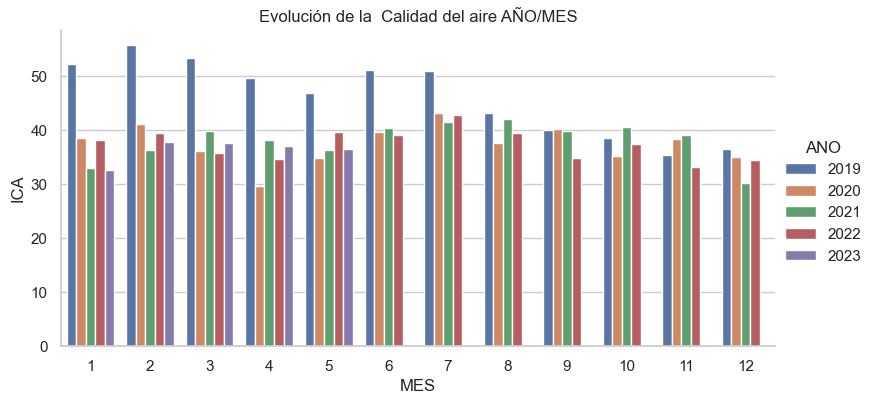

In [34]:
sns.catplot(data=df_year_month, x='MES', y='ICA', hue='ANO', kind='bar',height=4,aspect=2)
plt.title('Evolución de la  Calidad del aire AÑO/MES' )

In [35]:
df_pivot = df1.pivot_table(index="MES", columns="ANO", values="ICA").round(2)
df_pivot.head(12)

ANO,2019,2020,2021,2022,2023
MES,,,,,
1,52.26,38.62,32.96,38.26,32.72
2,55.81,41.18,36.33,39.51,37.84
3,53.39,36.26,39.80,35.74,37.68
4,49.79,29.71,38.21,34.63,37.16
5,46.98,34.84,36.39,39.62,36.55
6,51.11,39.79,40.40,39.12,NaN
7,51.03,43.15,41.61,42.93,NaN
8,43.16,37.67,42.15,39.46,NaN
9,40.02,40.23,39.95,34.83,NaN


In [36]:
df_pivot.isnull().sum()

ANO
2019    0
2020    0
2021    0
2022    0
2023    7
dtype: int64

In [37]:
df_pivot[2023.0] = df_pivot[2023.0].fillna(0)

In [38]:
df_pivot.head(12)

ANO,2019,2020,2021,2022,2023
MES,,,,,
1,52.26,38.62,32.96,38.26,32.72
2,55.81,41.18,36.33,39.51,37.84
3,53.39,36.26,39.80,35.74,37.68
4,49.79,29.71,38.21,34.63,37.16
5,46.98,34.84,36.39,39.62,36.55
6,51.11,39.79,40.40,39.12,0.00
7,51.03,43.15,41.61,42.93,0.00
8,43.16,37.67,42.15,39.46,0.00
9,40.02,40.23,39.95,34.83,0.00


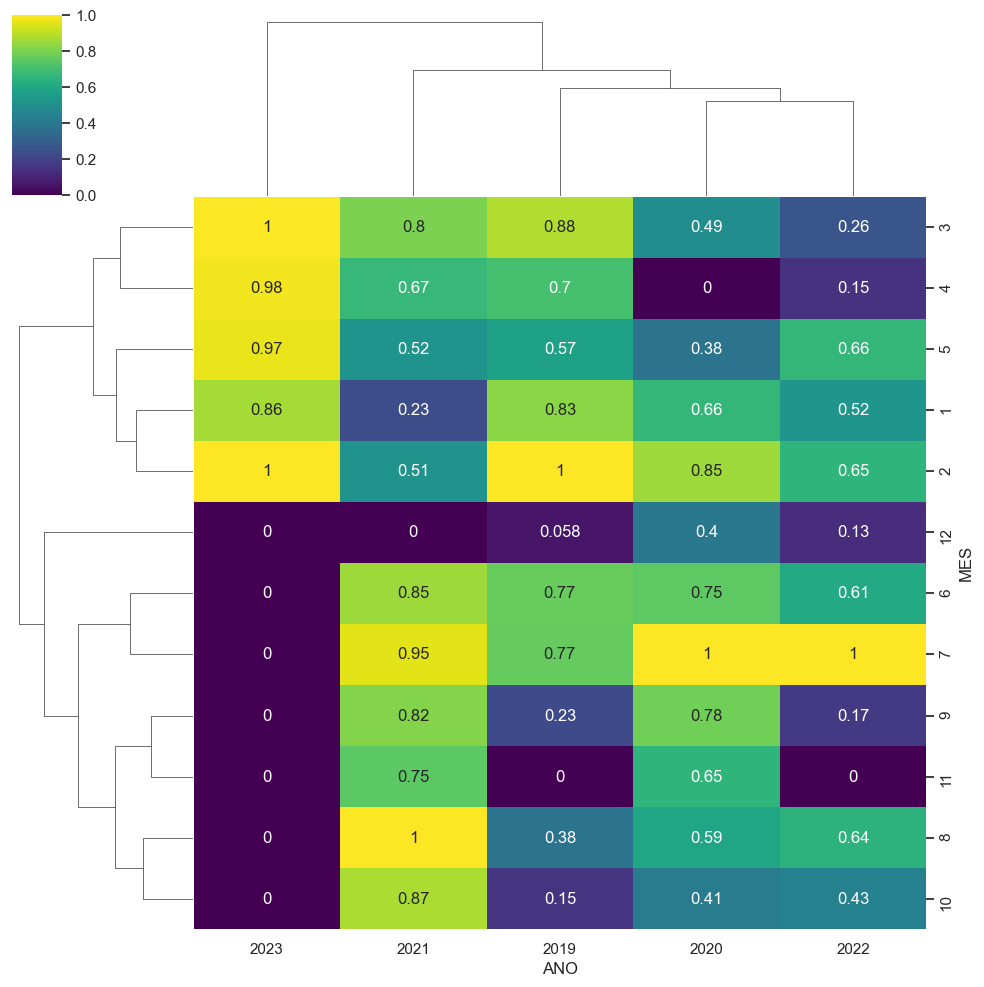

In [39]:
sns.clustermap(df_pivot, cmap="viridis", standard_scale=1, annot=True)

## ANÁLISIS MULTIVARIANTE

In [40]:
df.columns

Index(['FECHA', 'DIA_SEMANA', 'SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX',
       'TEMPERATURA', 'HUMEDAD', 'ICA', 'ESCALA_ICA'],
      dtype='object')

<Axes: >

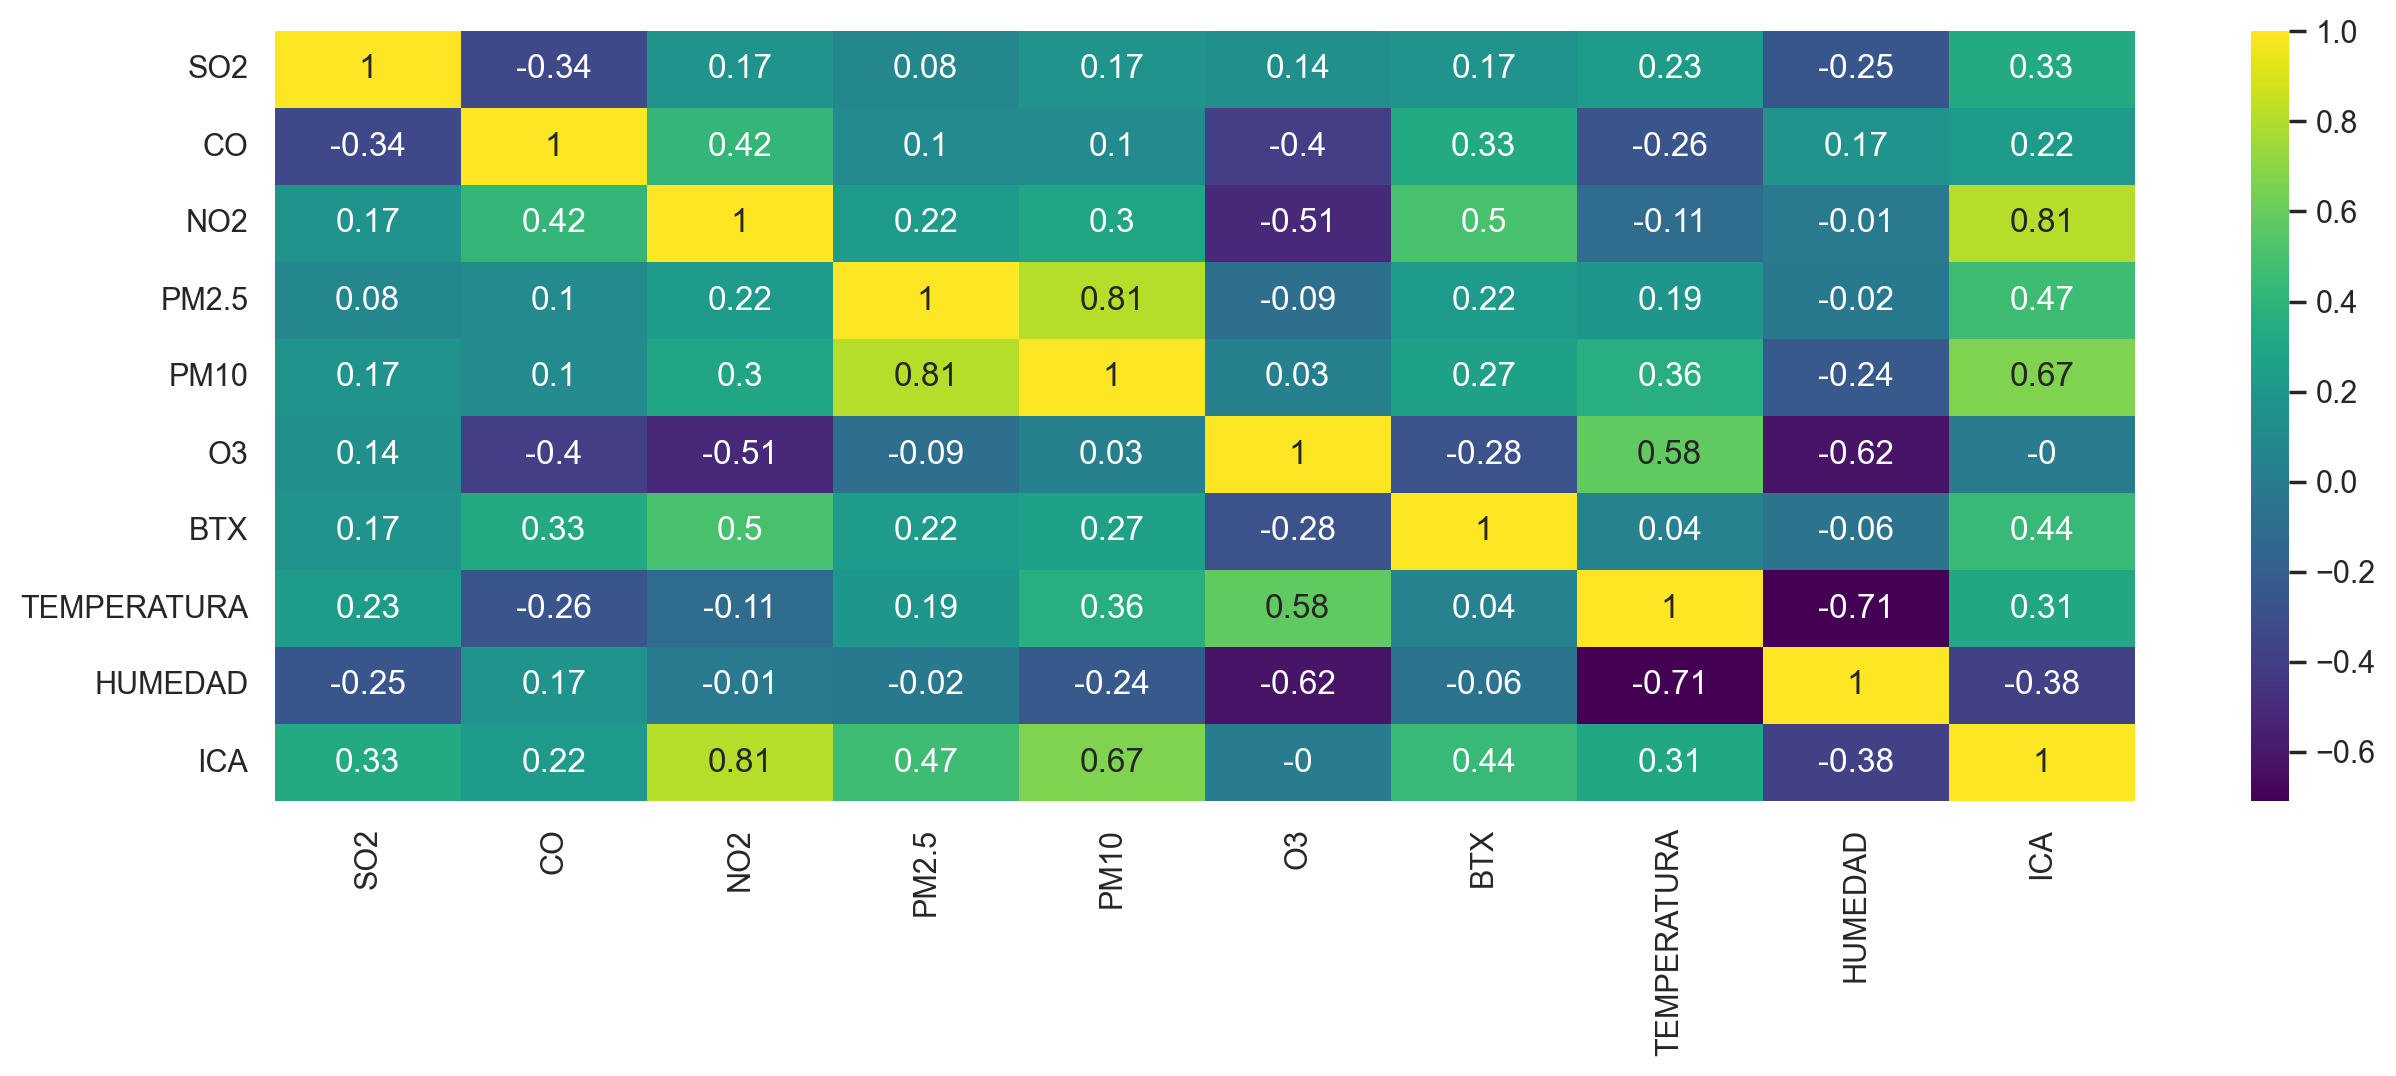

In [41]:
plt.figure(figsize=(15, 5), dpi=200)

df_corr = df.corr(numeric_only=True).round(2)
#filter = np.triu(df_corr)# np.triu para el triángulo superior
sns.heatmap(df_corr, annot=True, cmap="viridis")

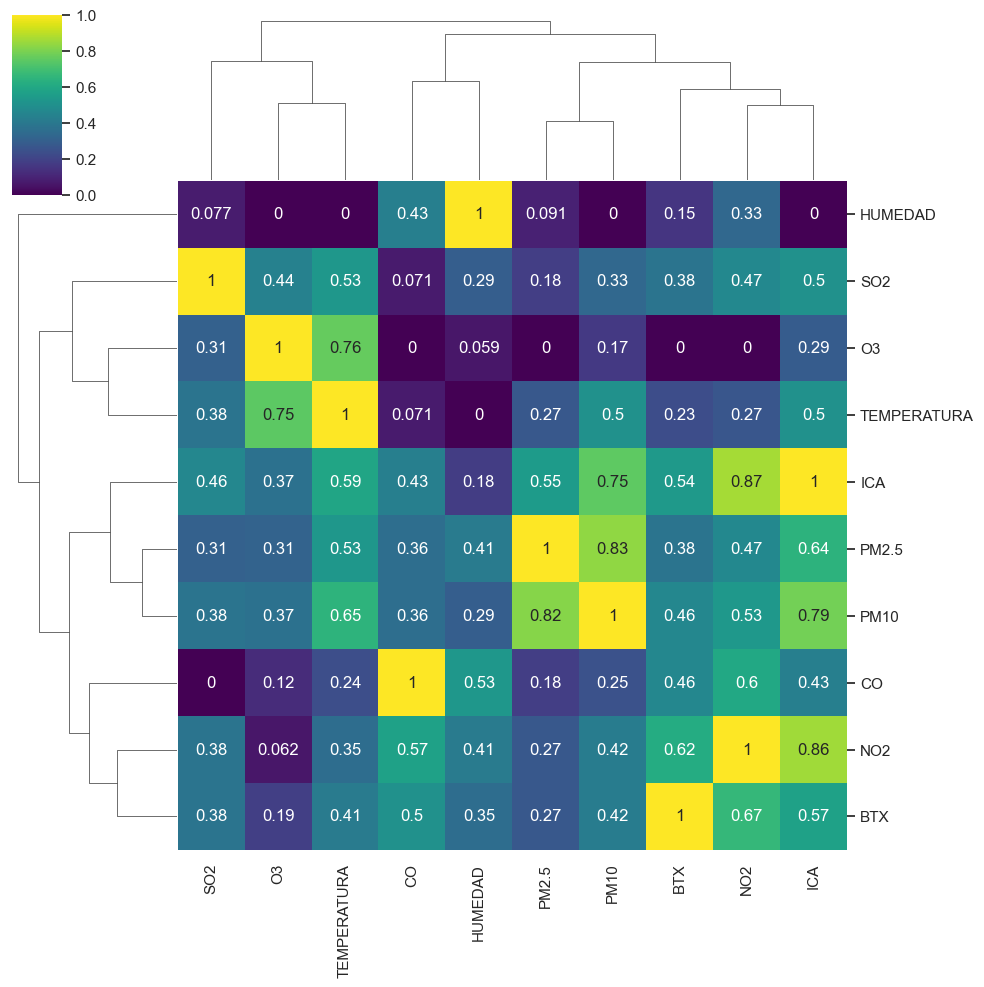

In [42]:
sns.clustermap(df_corr.round(1), cmap="viridis", standard_scale=1, annot=True)

C:\Users\emona\AppData\Local\Temp\ipykernel_22908\125658275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr =df1.corr() # matriz de correlación


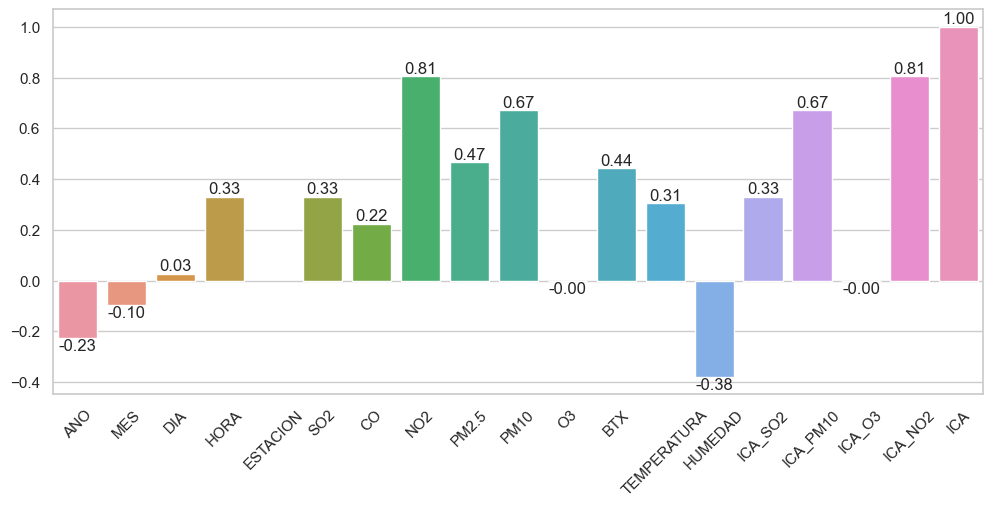

In [43]:
# Correlación con barras
df_corr =df1.corr() # matriz de correlación

corr_ICA = df_corr['ICA'] # filtrar correlación precio
filter = (corr_ICA<-0.1) | (corr_ICA>0.1) # filtrar aquellas con baja correlación
corr_price = corr_ICA[filter]
corr_price = corr_price.sort_values(ascending=False)[1:] # ordenar descendente

plt.figure(figsize=(12,5))
ax =sns.barplot(x=corr_ICA.index, y=corr_ICA.values)
plt.xticks(rotation=45)

labels = [f'{value:.2f}' for value in corr_ICA.values] # redondear las correlaciones a dos decimales
#labels =[str(round(value,2)) for value in corr_price.values]
ax.bar_label(ax.containers[0], labels= labels);